# Synthetic control with sci-kit learn models

In [1]:
from sklearn.linear_model import LinearRegression

import causalpy as cp

## Load data

In [2]:
df = cp.load_data("sc")
treatment_time = 70

## Analyse with `WeightedProportion` model

In [3]:
# Note, we do not want an intercept in this model
result = cp.skl_experiments.SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g",
    model=cp.skl_models.WeightedProportion(),
)

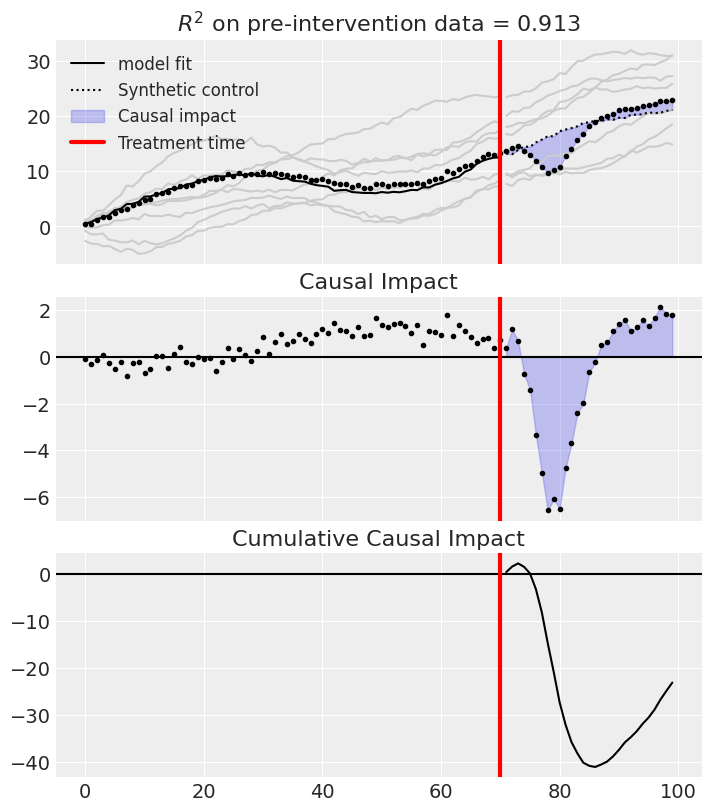

In [4]:
fig, ax = result.plot(plot_predictors=True)

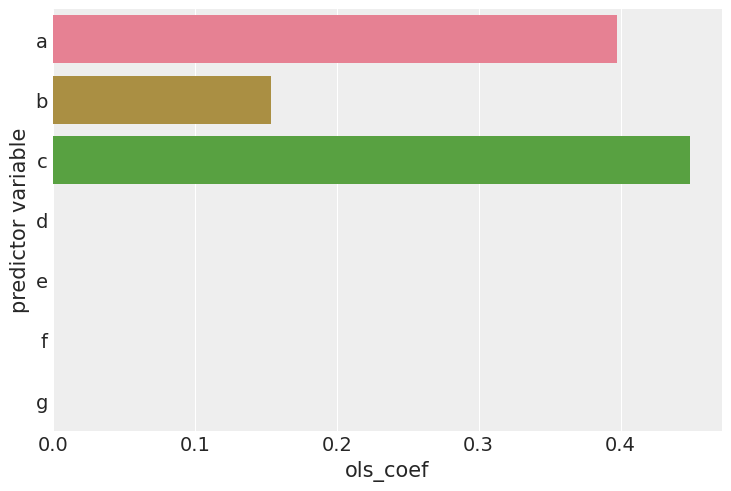

In [5]:
result.plot_coeffs()

But we can see that (for this dataset) these estimates are quite bad. So we can lift the "sum to 1" assumption and instead use the `LinearRegression` model, but still constrain weights to be positive. Equally, you could experiment with the `Ridge` model (e.g. `Ridge(positive=True, alpha=100)`).

## Analyse with the `LinearRegression` model

In [6]:
# Note, we do not want an intercept in this model
result = cp.skl_experiments.SyntheticControl(
    df,
    treatment_time,
    formula="actual ~ 0 + a + b + c + d + e + f + g",
    model=LinearRegression(positive=True),
)

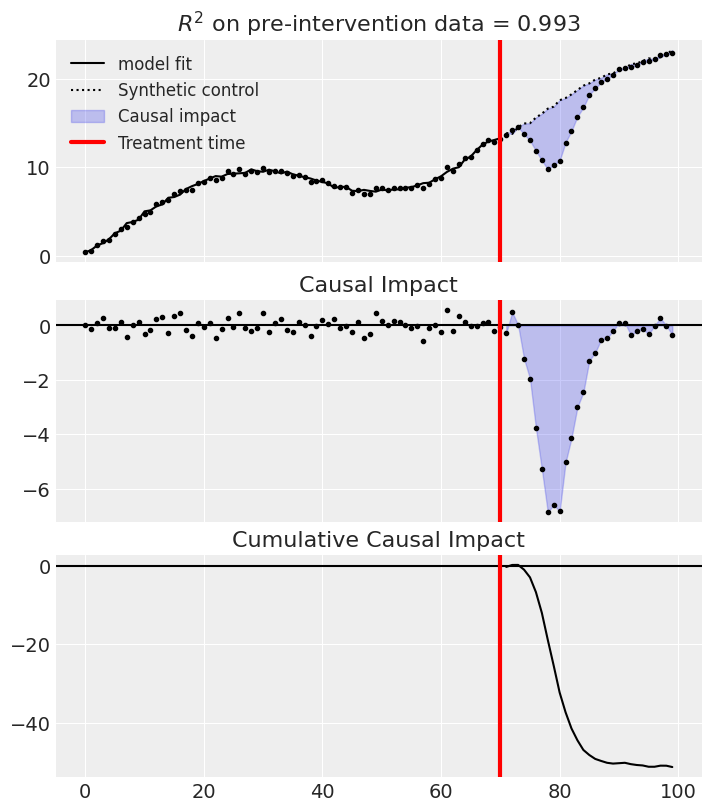

In [7]:
fig, ax = result.plot()

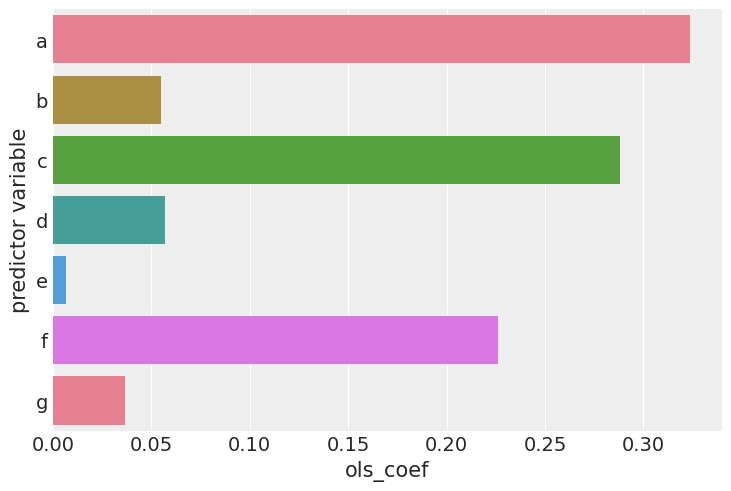

In [8]:
result.plot_coeffs()